<a href="https://colab.research.google.com/github/sahokk/AI-app/blob/main/voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -O 'https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  198M  100  198M    0     0  17.9M      0  0:00:11  0:00:11 --:--:-- 22.8M


In [ ]:
!unzip -q 'Audio_Speech_Actors_01-24.zip'

In [ ]:
!ls -l

total 203684
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_01
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_02
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_03
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_04
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_05
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_06
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_07
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_08
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_09
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_10
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_11
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_12
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_13
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_14
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_15
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_16
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_17
drwxr-xr-x 2 root root      4096 Mar 22  2018 Actor_

In [ ]:
!ls Actor_01

03-01-01-01-01-01-01.wav  03-01-04-01-01-01-01.wav  03-01-06-02-01-01-01.wav
03-01-01-01-01-02-01.wav  03-01-04-01-01-02-01.wav  03-01-06-02-01-02-01.wav
03-01-01-01-02-01-01.wav  03-01-04-01-02-01-01.wav  03-01-06-02-02-01-01.wav
03-01-01-01-02-02-01.wav  03-01-04-01-02-02-01.wav  03-01-06-02-02-02-01.wav
03-01-02-01-01-01-01.wav  03-01-04-02-01-01-01.wav  03-01-07-01-01-01-01.wav
03-01-02-01-01-02-01.wav  03-01-04-02-01-02-01.wav  03-01-07-01-01-02-01.wav
03-01-02-01-02-01-01.wav  03-01-04-02-02-01-01.wav  03-01-07-01-02-01-01.wav
03-01-02-01-02-02-01.wav  03-01-04-02-02-02-01.wav  03-01-07-01-02-02-01.wav
03-01-02-02-01-01-01.wav  03-01-05-01-01-01-01.wav  03-01-07-02-01-01-01.wav
03-01-02-02-01-02-01.wav  03-01-05-01-01-02-01.wav  03-01-07-02-01-02-01.wav
03-01-02-02-02-01-01.wav  03-01-05-01-02-01-01.wav  03-01-07-02-02-01-01.wav
03-01-02-02-02-02-01.wav  03-01-05-01-02-02-01.wav  03-01-07-02-02-02-01.wav
03-01-03-01-01-01-01.wav  03-01-05-02-01-01-01.wav  03-01-08-01-01-01-01.wav

In [ ]:
from IPython.display import Audio

In [ ]:
Audio('Actor_01/03-01-04-01-01-01-01.wav')

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from glob import glob
import librosa
import numpy as np

In [ ]:
files = [
    'Actor_*/03-01-01-*.wav',#neutral 96
    'Actor_*/03-01-02-*.wav',#calm 192
    'Actor_*/03-01-03-*.wav',#happy
    'Actor_*/03-01-04-*.wav',#sad
    'Actor_*/03-01-05-*.wav',#angry
    'Actor_*/03-01-06-*.wav',#fear(afraid)
    'Actor_*/03-01-07-*.wav',#disgust
    'Actor_*/03-01-08-*.wav',#surprised
]

dataset = np.hstack([
    np.array([
        librosa.feature.mfcc(*librosa.load(wav)).T for wav in glob(f)
    ]) for f in files
])

label = np.hstack([
    np.full(len(glob(f)), i) for i, f in enumerate(files)
])

<ipython-input-50-48abb383a733>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([


In [ ]:
label

array([0, 0, 0, ..., 7, 7, 7])

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_preprocessing.sequence import pad_sequences
dataset = pad_sequences(dataset, 300, dtype=dataset[0].dtype)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(dataset, label,  test_size=0.3, random_state=100)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras import layers

model = Sequential([
    LSTM(256, input_shape=(300, 20)),
    layers.Dropout(0.25),

    Dense(8, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

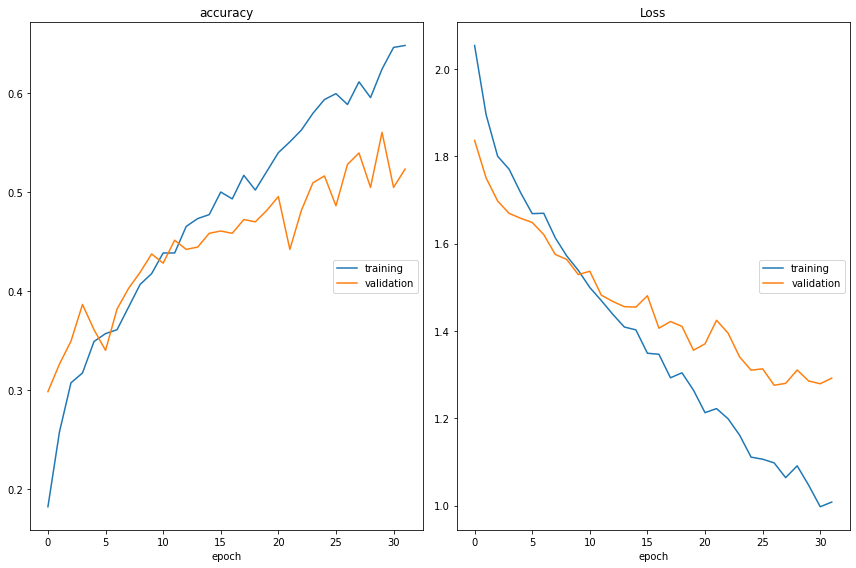

accuracy
	training         	 (min:    0.183, max:    0.648, cur:    0.648)
	validation       	 (min:    0.299, max:    0.560, cur:    0.523)
Loss
	training         	 (min:    0.997, max:    2.054, cur:    1.008)
	validation       	 (min:    1.276, max:    1.837, cur:    1.292)
32/32 [==============================] - 31s 982ms/step - loss: 1.0081 - accuracy: 0.6478 - val_loss: 1.2920 - val_accuracy: 0.5231


In [ ]:
from livelossplot import PlotLossesKeras
model.fit(train_data, train_label, epochs=32, validation_data=(test_data, test_label), callbacks=[PlotLossesKeras()])

In [ ]:
from matplotlib import pyplot
import tensorflow as tf

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
tests = test_data[50:58]
r = probability_model(tests)
result = []
for i in np.argmax(r.numpy(), axis=1):
    result.append(labels[i])
print(result)